<a href="https://colab.research.google.com/github/vengie/Project42_ELOGISTIX/blob/main/Notebooks/logistix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_url='https://raw.githubusercontent.com/vengie/Project42_ELOGISTIX/main/Data/DSMMProject42-CPL-5559-Ecom_Shipping_stride.csv'
data = pd.read_csv(data_url)
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# data = pd.read_csv('project data.csv')
# data

In [ ]:
print(data.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [ ]:
print(data.describe())

                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16

In [ ]:
# Check for missing values
print(data.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


#Visualization

In [ ]:
# Check for duplicates
print(data.duplicated().sum())


0


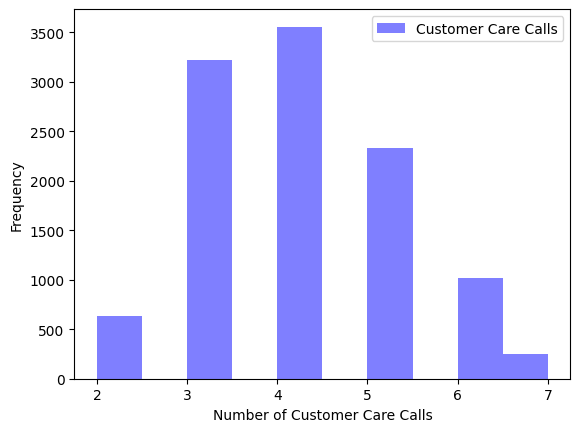

In [4]:
#Histograms help to understand the distribution of numerical variables in dataset
plt.hist(data['Customer_care_calls'], bins=10, alpha=0.5, color='blue', label='Customer Care Calls')
plt.xlabel('Number of Customer Care Calls')
plt.ylabel('Frequency')
plt.legend()
plt.show()

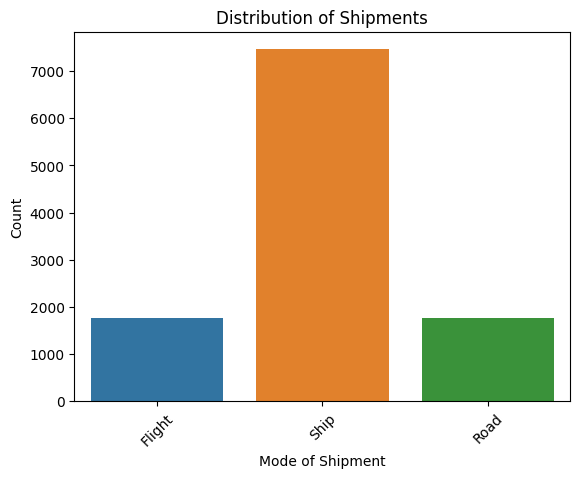

In [8]:
#bar charts to visualize categorical data or to compare different categories.
sns.countplot(x='Mode_of_Shipment', data=data)
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.title('Distribution of Shipments')
plt.xticks(rotation=45)
plt.show()

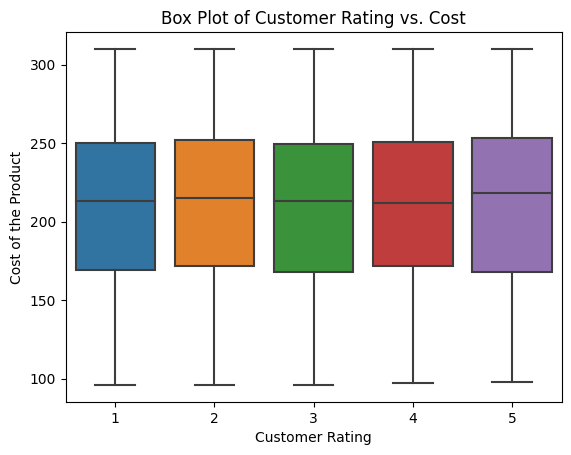

In [7]:
#Box plots can help understand the distribution and identify outliers in numerical data
sns.boxplot(x='Customer_rating', y='Cost_of_the_Product', data=data)
plt.xlabel('Customer Rating')
plt.ylabel('Cost of the Product')
plt.title('Box Plot of Customer Rating vs. Cost')
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load your cleaned dataset
data = pd.read_csv('project data.csv')

In [ ]:
# Encode categorical variables using Label Encoding for non-binary categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# Separate features (X) and target variable (y)
X = data.drop('Reached.on.Time_Y.N', axis=1)  # Adjust 'target_column' to your target variable
y = data['Reached.on.Time_Y.N']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define a list of classifiers to compare
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


In [ ]:
# Dictionary to store accuracy scores for each classifier
accuracy_scores = {}

In [ ]:
# Loop through classifiers and evaluate accuracy using cross-validation
for clf_name, clf in classifiers.items():
    # Perform 5-fold cross-validation and compute accuracy scores
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Store the mean accuracy score in the dictionary
    accuracy_scores[clf_name] = scores.mean()

In [ ]:

# Print the accuracy scores for each classifier
for clf_name, accuracy in accuracy_scores.items():
    print(f'{clf_name}: Mean Accuracy = {accuracy:.2f}')


Random Forest: Mean Accuracy = 0.66
Gradient Boosting: Mean Accuracy = 0.68
Support Vector Machine: Mean Accuracy = 0.69
Logistic Regression: Mean Accuracy = 0.66
Decision Tree: Mean Accuracy = 0.64


In [ ]:
# Evaluate each classifier using cross-validation
results = {}
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    results[clf_name] = scores.mean()


In [ ]:
# Select the best classifier based on mean cross-validation accuracy
best_classifier = max(results, key=results.get)


In [ ]:
# Train the selected best classifier on the full training data
best_model = classifiers[best_classifier]
best_model.fit(X_train, y_train)


SVC()

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)


In [ ]:
# Evaluate the best model's accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model: {best_classifier}')
print(f'Accuracy on Test Set: {accuracy:.2f}')

Best Model: Support Vector Machine
Accuracy on Test Set: 0.69
